# Lab 9: Regular Expressions and Factors


# Preliminaries



# Regular Expressions


In [43]:
library(tidyverse)

## Regular Expressions are Hard

-  Even seasoned programmers often struggle with regular expressions; they require a lot of practice to master.
-  Many people have written entire books with different animals on the cover just on the topic, and this is just from one publisher.


![owl](https://raw.githubusercontent.com/dereklhansen/stats306_lab/master/lab8/owl.jpg)
![weasel](https://raw.githubusercontent.com/dereklhansen/stats306_lab/master/lab8/weasel.jpg)
![bat](https://raw.githubusercontent.com/dereklhansen/stats306_lab/master/lab8/bat.jpg)


-  This website will let you test out regular expressions on the fly: https://www.regexpal.com/ or https://regex101.com/
-  Be sure to check the "multiline" box under "flags"

![](https://raw.githubusercontent.com/dereklhansen/stats306_lab/master/lab8/regex_pal2.png)

## RegExr
-  RegExr is a more powerful website that color-codes expressions as you build them: https://regexr.com/

![](https://raw.githubusercontent.com/dereklhansen/stats306_lab/master/lab8/regexr.png)

## Using Regular Expressions in dplyr
- Regular expressions aren't just useful for text data. It is also useful when data comes in a wide format with many columns that are hard to reconcile.
- Here we have a table of crime data by age, sex, and race from the ICSPR at the University of Michigan (original source here: https://www.icpsr.umich.edu/web/NACJD/studies/36115)
- As you'll see below, each row corresponds to a particular agency, month, and offense. The subsequent columns denotes counts of gender-age crimes (e.g. "F20" is how many reports for females age 20), or of different racial groups which are broken up by juvenile-status and race ("AW" is Adult White).
- While high-quality, this data is not very tidy; it is good example of how data actually comes in the real world.


## Tidy data
There are many different ways to represent data in a table, but some are better than others.
We say that a data table is "[tidy](http://vita.had.co.nz/papers/tidy-data.pdf)" if:
- Each row represents an observation.
- Each column represents a variable.
- Each value gets its own cell.
- Each different type of data set gets its own table.

In [44]:
icpsr_raw <- read_csv("https://raw.githubusercontent.com/dereklhansen/stats306_lab/master/lab8/icpsr_raw.csv")

Rows: 58277 Columns: 89

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (6): ORI, GROUP, CORE, AGENCY, STNAME, OFFENSE
dbl (83): ASR_ID, CONTENTS, STATE, DIV, AGHEADER, YEAR, MSA, COUNTY, SEQNO, ...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [45]:
glimpse(icpsr_raw)

Rows: 58,277
Columns: 89
$ ASR_ID   <dbl> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3~
$ CONTENTS <dbl> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3~
$ STATE    <dbl> 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 2~
$ ORI      <chr> "MI01001", "MI01001", "MI01001", "MI01001", "MI01001", "MI010~
$ GROUP    <chr> "8D", "8D", "8D", "8D", "8D", "8D", "8D", "8D", "8D", "8D", "~
$ DIV      <dbl> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3~
$ AGHEADER <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0~
$ YEAR     <dbl> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2~
$ MSA      <dbl> 998, 998, 998, 998, 998, 998, 998, 998, 998, 998, 998, 998, 9~
$ COUNTY   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1~
$ SEQNO    <dbl> 70480, 70480, 70480, 70480, 70480, 70480, 70480, 70480, 70480~
$ SUB      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0~
$ CORE     <chr

- We want to form a table of the crime data of gender and age groups. We use regular expressions to select the columns that match the age-gender format we saw
- We can print out our columns, then copy-pasted them into RegExr

In [46]:
message(paste0(names(icpsr_raw), collapse="\n"))

ASR_ID
CONTENTS
STATE
ORI
GROUP
DIV
AGHEADER
YEAR
MSA
COUNTY
SEQNO
SUB
CORE
COVBY
POP
AGENCY
STNAME
MONTH
MOHEADER
BREAK
AREO
ZERO
DTLASTUP
DTPRUP1
DTPRUP2
JUVDISP
JDHANDDP
JDREFJC
JDREFWA
JDREFOPA
JDREFCC
OFFENSE
OCCUR
M0_9
M10_12
M13_14
M15
M16
M17
M18
M19
M20
M21
M22
M23
M24
M25_29
M30_34
M35_39
M40_44
M45_49
M50_54
M55_59
M60_64
M65
F0_9
F10_12
F13_14
F15
F16
F17
F18
F19
F20
F21
F22
F23
F24
F25_29
F30_34
F35_39
F40_44
F45_49
F50_54
F55_59
F60_64
F65
AW
AB
AI
AA
JW
JB
JI
JA
AH
AN
JH
JN



![](https://raw.githubusercontent.com/dereklhansen/stats306_lab/master/lab8/gender_age2.png)

-  We then use the ```matches``` function within ```select```. ```matches``` will keep all columns that match our regular expression.
-  Matches works with tidyr functions as well

In [47]:
icpsr_gender_age <- icpsr_raw %>%
  filter(CONTENTS == 3) %>%
  select(originating_agency = ORI,
         month = MONTH,
         offense = OFFENSE,
         matches("^(M|F)[0-9]+")) %>%
  gather(matches("^(M|F)[0-9]+"), 
         key = "gender_age",
         value = "count") %>%
  mutate(count = ifelse(count == 99999, 0, count)) %>%
  mutate(count = ifelse(count == 99998, NA_real_, count)) %>%
  separate(gender_age, into = c("gender", "age"), sep=1)

In [48]:
print(icpsr_gender_age)

# A tibble: 2,521,640 x 6
   originating_agency month offense gender age   count
   <chr>              <dbl> <chr>   <chr>  <chr> <dbl>
 1 MI01001                1 26      M      0_9       0
 2 MI01001                2 26      M      0_9       0
 3 MI01001                3 18      M      0_9       0
 4 MI01001                3 185     M      0_9       0
 5 MI01001                3 18F     M      0_9       0
 6 MI01001                4 18      M      0_9       0
 7 MI01001                4 180     M      0_9       0
 8 MI01001                4 18D     M      0_9       0
 9 MI01001                5 18      M      0_9       0
10 MI01001                5 185     M      0_9       0
# ... with 2,521,630 more rows


- In this simple case, we could just use the tidyr ```separate``` function with an index (1) 
- The ```extract``` function from ```tidyr``` is more powerful, as we can have it search for particular patterns

In [49]:
icpsr_gender_age <- icpsr_raw %>%
  filter(CONTENTS == 3) %>%
  select(originating_agency = ORI,
         month = MONTH,
         offense = OFFENSE,
         matches("^(M|F)[0-9]+")) %>%
  gather(matches("^(M|F)[0-9]+"), 
         key = "gender_age",
         value = "count") %>%
  mutate(count = ifelse(count == 99999, 0, count)) %>%
  mutate(count = ifelse(count == 99998, NA_real_, count)) %>%
  extract(gender_age, into = c("gender", "age"), regex=("(M|F)([0-9]+)"))
print(icpsr_gender_age )

# A tibble: 2,521,640 x 6
   originating_agency month offense gender age   count
   <chr>              <dbl> <chr>   <chr>  <chr> <dbl>
 1 MI01001                1 26      M      0         0
 2 MI01001                2 26      M      0         0
 3 MI01001                3 18      M      0         0
 4 MI01001                3 185     M      0         0
 5 MI01001                3 18F     M      0         0
 6 MI01001                4 18      M      0         0
 7 MI01001                4 180     M      0         0
 8 MI01001                4 18D     M      0         0
 9 MI01001                5 18      M      0         0
10 MI01001                5 185     M      0         0
# ... with 2,521,630 more rows


-  What happened? Try looking back at our website code
-  Our regular expression was good enough to find the right columns, but "[0-9]+" doesn't match to any of the names with underscores (such as "M0_9")
-  This is why regular expressions are tricky to master!

In [50]:
icpsr_gender_age <- icpsr_raw %>%
  filter(CONTENTS == 3) %>%
  select(originating_agency = ORI,
         month = MONTH,
         offense = OFFENSE,
         matches("^(M|F)[0-9]+")) %>%
  gather(matches("^(M|F)[0-9]+"), 
         key = "gender_age",
         value = "count") %>%
  mutate(count = ifelse(count == 99999, 0, count)) %>%
  mutate(count = ifelse(count == 99998, NA_real_, count)) %>%
  extract(gender_age, into = c("gender", "age"), regex=("(M|F)([0-9]+$|[0-9]+_[0-9]+)"))
print(icpsr_gender_age)

# A tibble: 2,521,640 x 6
   originating_agency month offense gender age   count
   <chr>              <dbl> <chr>   <chr>  <chr> <dbl>
 1 MI01001                1 26      M      0_9       0
 2 MI01001                2 26      M      0_9       0
 3 MI01001                3 18      M      0_9       0
 4 MI01001                3 185     M      0_9       0
 5 MI01001                3 18F     M      0_9       0
 6 MI01001                4 18      M      0_9       0
 7 MI01001                4 180     M      0_9       0
 8 MI01001                4 18D     M      0_9       0
 9 MI01001                5 18      M      0_9       0
10 MI01001                5 185     M      0_9       0
# ... with 2,521,630 more rows


**Exercise:**

Instead of age being a character, split the range into age_min and age_max. If there is just one age, set age_min=age_max

**Solution:**

You could just do ```separate``` on the "age" column. Or you can do it directly, all with regular expressions!

We need to make sure that we handle all cases properly. We define three groups to define gender_age:
-  ```"(M|F)"``` matches either male or female
-  ```"([0-9]+)"``` matches "9", "20", etc.
-  ```"((_[0-9]+|)"``` matches ```"_10"```, ```"_100"```, **or nothing**. If we don't specify this, the rows where the string does not match this pattern will return "NA" for all values.

In [51]:
icpsr_gender_age2 <- icpsr_raw %>%
  filter(CONTENTS == 3) %>%
  select(originating_agency = ORI,
         month = MONTH,
         offense = OFFENSE,
         matches("^(M|F)[0-9]+")) %>%
  gather(matches("^(M|F)[0-9]+"), 
         key = "gender_age",
         value = "count") %>%
  mutate(count = ifelse(count == 99999, 0, count)) %>%
  mutate(count = ifelse(count == 99998, NA_real_, count)) %>%
  extract(gender_age, into = c("gender", "age_min_str", "age_max_str"), regex=("(M|F)([0-9]+)(_[0-9]+|)")) %>%
  mutate(age_min = as.integer(age_min_str), age_max=as.integer(str_sub(age_max_str, 2))) %>%
  mutate(age_max = ifelse(is.na(age_max), age_min, age_max))
print(icpsr_gender_age2)


# A tibble: 2,521,640 x 9
   originating_agency month offense gender age_min_str age_max_str count age_min
   <chr>              <dbl> <chr>   <chr>  <chr>       <chr>       <dbl>   <int>
 1 MI01001                1 26      M      0           _9              0       0
 2 MI01001                2 26      M      0           _9              0       0
 3 MI01001                3 18      M      0           _9              0       0
 4 MI01001                3 185     M      0           _9              0       0
 5 MI01001                3 18F     M      0           _9              0       0
 6 MI01001                4 18      M      0           _9              0       0
 7 MI01001                4 180     M      0           _9              0       0
 8 MI01001                4 18D     M      0           _9              0       0
 9 MI01001                5 18      M      0           _9              0       0
10 MI01001                5 185     M      0           _9              0       0
# 

In [52]:
print(filter(icpsr_gender_age2, age_min==20))

# A tibble: 114,620 x 9
   originating_agency month offense gender age_min_str age_max_str count age_min
   <chr>              <dbl> <chr>   <chr>  <chr>       <chr>       <dbl>   <int>
 1 MI01001                1 26      M      20          ""              0      20
 2 MI01001                2 26      M      20          ""              0      20
 3 MI01001                3 18      M      20          ""              0      20
 4 MI01001                3 185     M      20          ""              0      20
 5 MI01001                3 18F     M      20          ""              0      20
 6 MI01001                4 18      M      20          ""              0      20
 7 MI01001                4 180     M      20          ""              0      20
 8 MI01001                4 18D     M      20          ""              0      20
 9 MI01001                5 18      M      20          ""              0      20
10 MI01001                5 185     M      20          ""              0      20
# ..

# Factors
- Factors are the traditional way to represent categorical data in R. To create a factor, we must specify the levels and the values
- If you specify the factor levels using the levels= option, then that will specify the default order. If you do not specify the levels, then they will be sorted alphabetically by default
- It's best to be explicit about the factor levels. This way, if you there are typos or data entry errors, you will catch them more easily

In [53]:
icpsr_gender_age_fctr <- icpsr_gender_age %>%
    mutate(originating_agency=factor(originating_agency), offense=factor(offense), gender=factor(gender), age=factor(age))
print(icpsr_gender_age_fctr)

# A tibble: 2,521,640 x 6
   originating_agency month offense gender age   count
   <fct>              <dbl> <fct>   <fct>  <fct> <dbl>
 1 MI01001                1 26      M      0_9       0
 2 MI01001                2 26      M      0_9       0
 3 MI01001                3 18      M      0_9       0
 4 MI01001                3 185     M      0_9       0
 5 MI01001                3 18F     M      0_9       0
 6 MI01001                4 18      M      0_9       0
 7 MI01001                4 180     M      0_9       0
 8 MI01001                4 18D     M      0_9       0
 9 MI01001                5 18      M      0_9       0
10 MI01001                5 185     M      0_9       0
# ... with 2,521,630 more rows


Suppose we want to make the age groupings more clear (i.e. say "0 to 9" instead of "0_9"). the ```fct_recode``` is useful for making quick changes https://forcats.tidyverse.org/reference/fct_recode.html

In [55]:
mutate(icpsr_gender_age_fctr, age=fct_recode(age, "0 to 9"="0_9", "10 to 12"="10_12", "13 to 14"="13_14")) %>%
    print()

# A tibble: 2,521,640 x 6
   originating_agency month offense gender age    count
   <fct>              <dbl> <fct>   <fct>  <fct>  <dbl>
 1 MI01001                1 26      M      0 to 9     0
 2 MI01001                2 26      M      0 to 9     0
 3 MI01001                3 18      M      0 to 9     0
 4 MI01001                3 185     M      0 to 9     0
 5 MI01001                3 18F     M      0 to 9     0
 6 MI01001                4 18      M      0 to 9     0
 7 MI01001                4 180     M      0 to 9     0
 8 MI01001                4 18D     M      0 to 9     0
 9 MI01001                5 18      M      0 to 9     0
10 MI01001                5 185     M      0 to 9     0
# ... with 2,521,630 more rows


However, in our case, it would be tedious to make this same change for every group. Instead, we can manipulate the ```levels``` directly, which lets us use regular expressions.

In [56]:
levels(icpsr_gender_age_fctr$age)

[1] "0_9"   "10_12" "13_14" "15"    "16"    "17"    "18"    "19"    "20"   
[10] "21"    "22"    "23"    "24"    "25_29" "30_34" "35_39" "40_44" "45_49"
[19] "50_54" "55_59" "60_64" "65"

In [57]:
levels(icpsr_gender_age_fctr$age) <- str_replace(levels(icpsr_gender_age_fctr$age), "_", " to ")

In [58]:
print(icpsr_gender_age_fctr)
print(levels(icpsr_gender_age_fctr$age))

# A tibble: 2,521,640 x 6
   originating_agency month offense gender age    count
   <fct>              <dbl> <fct>   <fct>  <fct>  <dbl>
 1 MI01001                1 26      M      0 to 9     0
 2 MI01001                2 26      M      0 to 9     0
 3 MI01001                3 18      M      0 to 9     0
 4 MI01001                3 185     M      0 to 9     0
 5 MI01001                3 18F     M      0 to 9     0
 6 MI01001                4 18      M      0 to 9     0
 7 MI01001                4 180     M      0 to 9     0
 8 MI01001                4 18D     M      0 to 9     0
 9 MI01001                5 18      M      0 to 9     0
10 MI01001                5 185     M      0 to 9     0
# ... with 2,521,630 more rows
 [1] "0 to 9"   "10 to 12" "13 to 14" "15"       "16"       "17"      
 [7] "18"       "19"       "20"       "21"       "22"       "23"      
[13] "24"       "25 to 29" "30 to 34" "35 to 39" "40 to 44" "45 to 49"
[19] "50 to 54" "55 to 59" "60 to 64" "65"      


For our last example, we use the ```gss_cat``` dataset. We want to extract different features of ```partyid```

https://forcats.tidyverse.org/reference/gss_cat.html

In [59]:
print(gss_cat)

# A tibble: 21,483 x 9
    year marital         age race  rincome        partyid  relig  denom  tvhours
   <int> <fct>         <int> <fct> <fct>          <fct>    <fct>  <fct>    <int>
 1  2000 Never married    26 White $8000 to 9999  Ind,nea~ Prote~ South~      12
 2  2000 Divorced         48 White $8000 to 9999  Not str~ Prote~ Bapti~      NA
 3  2000 Widowed          67 White Not applicable Indepen~ Prote~ No de~       2
 4  2000 Never married    39 White Not applicable Ind,nea~ Ortho~ Not a~       4
 5  2000 Divorced         25 White Not applicable Not str~ None   Not a~       1
 6  2000 Married          25 White $20000 - 24999 Strong ~ Prote~ South~      NA
 7  2000 Never married    36 White $25000 or more Not str~ Chris~ Not a~       3
 8  2000 Divorced         44 White $7000 to 7999  Ind,nea~ Prote~ Luthe~      NA
 9  2000 Married          44 White $25000 or more Not str~ Prote~ Other        0
10  2000 Married          47 White $25000 or more Strong ~ Prote~ South~       3
# ...

In [60]:
print(levels(gss_cat$partyid))

 [1] "No answer"          "Don't know"         "Other party"       
 [4] "Strong republican"  "Not str republican" "Ind,near rep"      
 [7] "Independent"        "Ind,near dem"       "Not str democrat"  
[10] "Strong democrat"   


Regular expressions don't need to be complicated to be useful! Even simple ones can save you a lot of time

In [61]:
gss_splitup <- mutate(gss_cat, 
       party    = str_extract(partyid, "(Ind|rep|dem|Other party|No answer|Don't know)"),
       leaning  = str_extract(partyid, "(rep|dem)"),
       strength_of_leaning = str_extract(partyid, "(Strong|Not str|Ind,near)")
      ) 

In [62]:
print(select(gss_splitup, partyid, party, leaning, strength_of_leaning))

# A tibble: 21,483 x 4
   partyid            party leaning strength_of_leaning
   <fct>              <chr> <chr>   <chr>              
 1 Ind,near rep       Ind   rep     Ind,near           
 2 Not str republican rep   rep     Not str            
 3 Independent        Ind   NA      NA                 
 4 Ind,near rep       Ind   rep     Ind,near           
 5 Not str democrat   dem   dem     Not str            
 6 Strong democrat    dem   dem     Strong             
 7 Not str republican rep   rep     Not str            
 8 Ind,near dem       Ind   dem     Ind,near           
 9 Not str democrat   dem   dem     Not str            
10 Strong republican  rep   rep     Strong             
# ... with 21,473 more rows


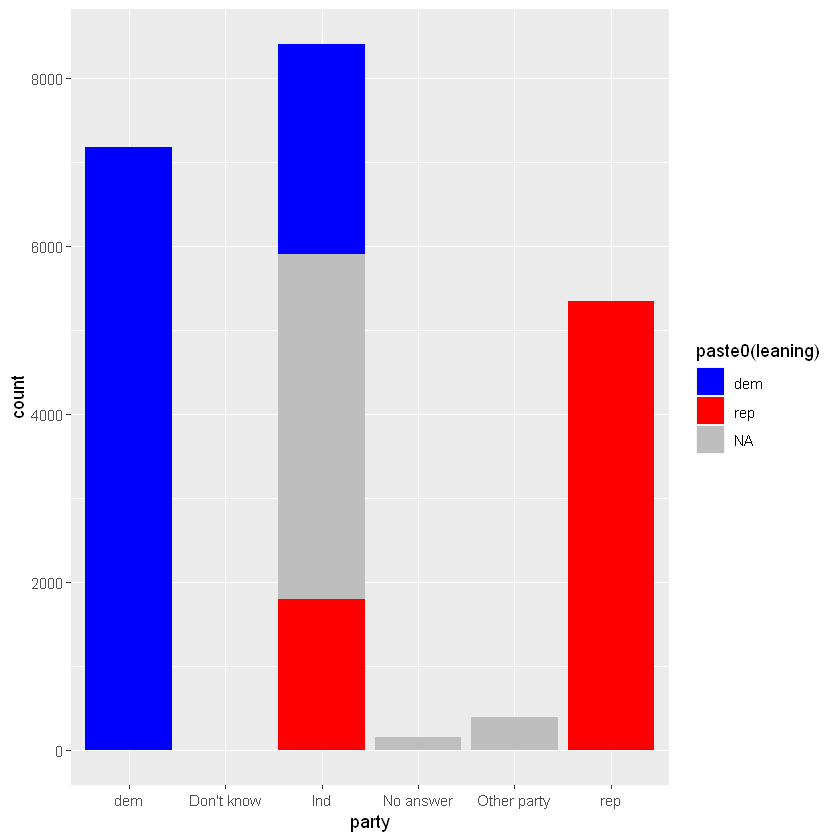

In [63]:
ggplot(gss_splitup) + geom_bar(aes(x=party, fill=paste0(leaning))) +
    scale_fill_manual(values = c(dem="blue", rep="red", `NA`="grey"))

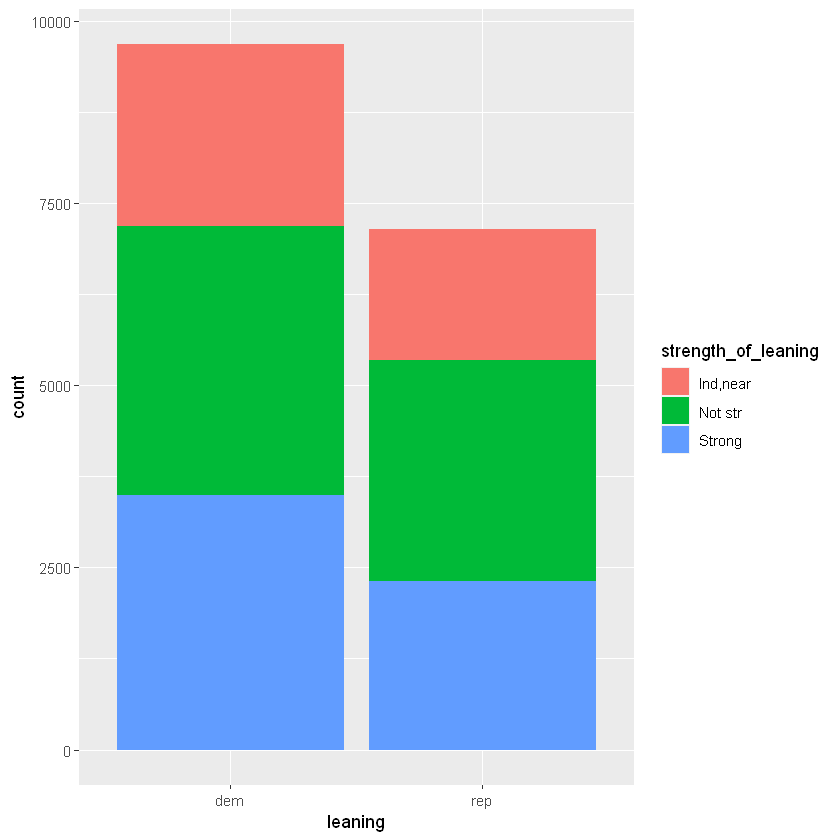

In [64]:
ggplot(filter(gss_splitup, !is.na(leaning))) + geom_bar(aes(x=leaning, fill=strength_of_leaning))

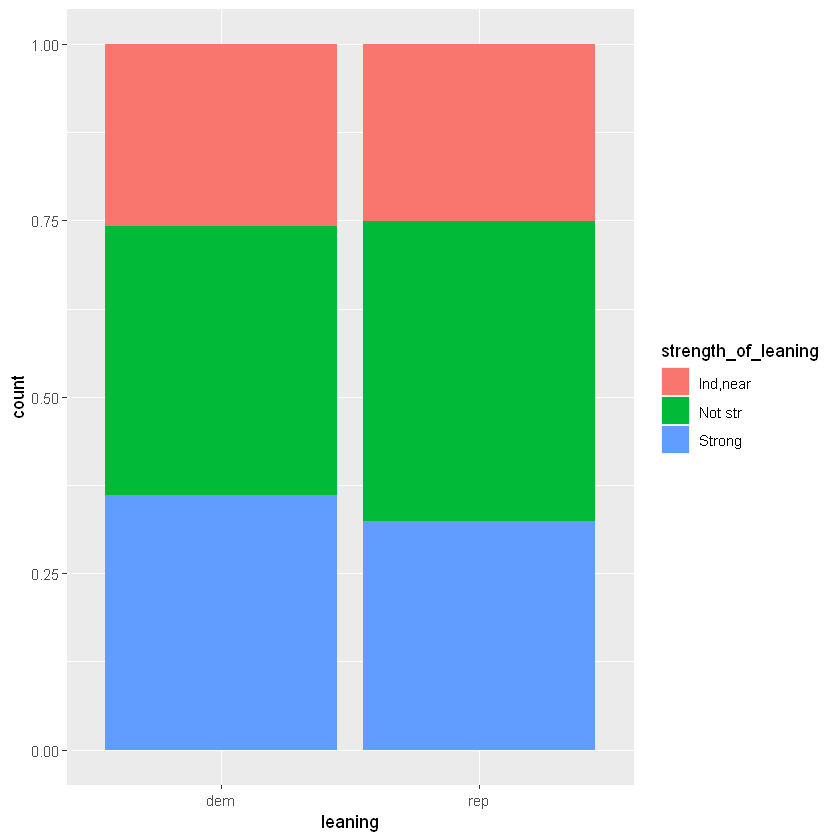

In [65]:
ggplot(filter(gss_splitup, !is.na(leaning))) + geom_bar(aes(x=leaning, fill=strength_of_leaning), position="fill")